# Natural Language Procession with Spam Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection")]

In [4]:
len(messages)

5574

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
# this is a tab sep 
messages = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=["label", "message"])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
# Separate the ham vs spam
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages["length"] = messages["message"].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


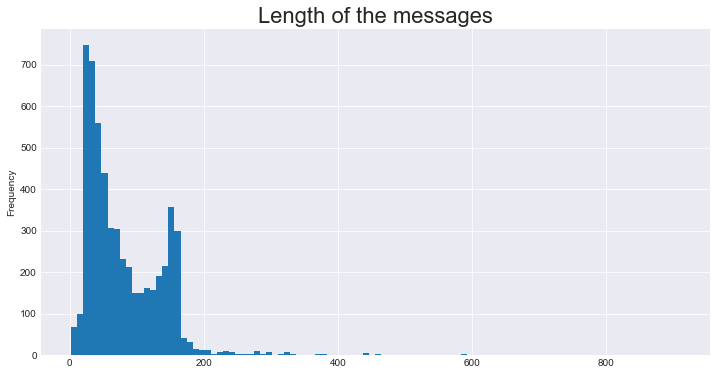

In [12]:
sns.set_style("darkgrid")
messages["length"].plot.hist(bins=100, figsize=(12,6))
plt.title("Length of the messages", fontsize=22)

In [13]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
# lets find the 910 char length
messages[messages["length"] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fc48eb8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a18695cc0>], dtype=object)

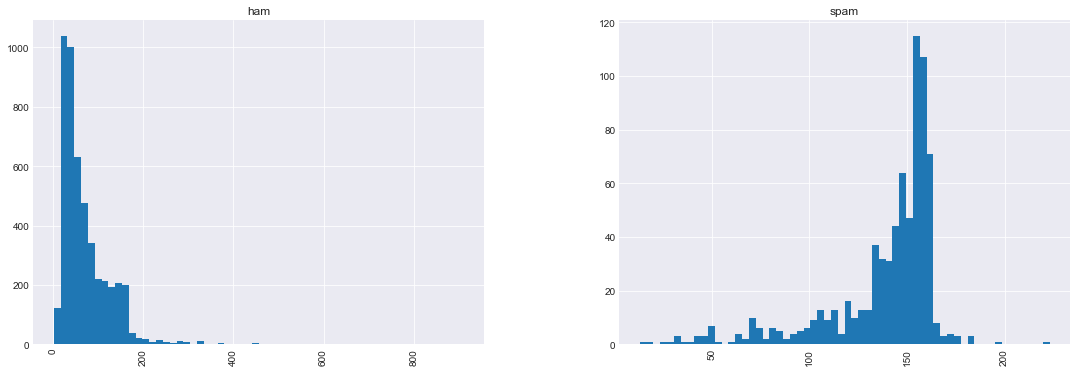

In [15]:
# Separate the length of ham vs spam
messages.hist(column="length", by="label", bins=60, figsize=(18,6))

In [16]:
# Convert the raw messages into vectors
import string

In [17]:
mess = "The sample Message! Notice: it has punctuation!!"

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
noPunc = "".join([c for c in mess if c not in string.punctuation])

In [20]:
print(noPunc)

The sample Message Notice it has punctuation


In [21]:
# remove stopwords (very commons words)
from nltk.corpus import stopwords

In [22]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [23]:
clean_mess = [word for word in noPunc.split() if word.lower() not in stopwords.words("english")]

In [24]:
clean_mess

['sample', 'Message', 'Notice', 'punctuation']

In [25]:
# Lets make it a function
def text_process(mess):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    """
    noPunc = "".join([char for char in mess if char not in string.punctuation])
    
    return [word for word in noPunc.split() if word.lower() not in stopwords.words("english")]

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Let's tokenize the messages

In [27]:
messages["message"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [28]:
# Lets vectorize it all! (Bag of word)
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# We are creating sparse matrix
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])

In [30]:
# Print the total numbers of vocabulary words
print(len(bow_transformer.vocabulary_))

11425


In [31]:
mess4 = messages["message"][3]

In [32]:
mess4

'U dun say so early hor... U c already then say...'

In [33]:
bow4 = bow_transformer.transform([mess4])

In [34]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [35]:
print(bow4.shape)

(1, 11425)


In [36]:
bow_transformer.get_feature_names()[4068]

'U'

In [37]:
bow_transformer.get_feature_names()[9554]

'say'

# Let's do it for all our datas

In [38]:
messages_bow = bow_transformer.transform(messages["message"])

In [39]:
print("Shape of the Sparse Matrix: ", messages_bow.shape)

Shape of the Sparse Matrix:  (5572, 11425)


In [40]:
# Check the amount of non zero occurence
messages_bow.nnz

50548

In [41]:
# Check the sparsity (# of nonzeros vs zeros)
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


# TF-IDF 
Term Frequency | Inverse Document Frequency

#### TF-IDF : Represent the weighted value for each of these words vs the actual document

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [44]:
# Check what we got with the 4th message
tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [45]:
# If you want to check for one word in particular
tfidf_transformer.idf_[bow_transformer.vocabulary_["university"]]

8.527076498901426

# convert the entire bow (bagOfWords) corpus into a TF-IDF corpus at once

In [46]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Let's use a Naive Bayes model (Good Choice) to predict Spam vs Ham

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages["label"])

In [49]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [50]:
messages["label"][3]

'ham'

Look good the the 4th message

# Let's test it on all our messages

In [51]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [52]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      dtype='<U4')

# Lets use train test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Split the datas
msg_train, msg_test, label_train, label_test = train_test_split(messages["message"], messages["label"],
                                                              test_size=0.3)

### Use sklearn pipeline
(Help you to dont repeat the sames tasks for differents sets of datas)

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
])

In [57]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a20bcb598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [58]:
predictions = pipeline.predict(msg_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1452
       spam       1.00      0.65      0.79       220

avg / total       0.96      0.95      0.95      1672



# Let's try with random forest clf

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
])

In [63]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a20bcb598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [64]:
predictions = pipeline.predict(msg_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1452
       spam       0.99      0.69      0.82       220

avg / total       0.96      0.96      0.96      1672

